In [70]:
import os as operating_system
from operator import itemgetter as get_item
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot_graphs
import warnings as warning_tools

# Hide all warning messages
warning_tools.filterwarnings('ignore')

# Show plots inside this notebook
get_ipython().magic(u'matplotlib inline')

# Use a simple ggplot style for all charts
plot_graphs.style.use('ggplot')

import tensorflow as tf_lib

from keras import (
    models as nn_models,
    regularizers as nn_regularizers,
    layers as nn_layers,
    optimizers as nn_optimizers,
    losses as nn_losses,
    metrics as nn_metrics
)
from keras.models import Sequential as SequentialModel
from keras.layers import Dense as DenseLayer
from keras.utils import to_categorical as to_one_hot

In [71]:
from keras.layers import Embedding as EmbeddingLayer

# The Embedding layer needs at least two values:
# 1000 is the vocabulary size (maximum word index + 1).
# 64 is the size of each word vector.
word_embedding_layer = EmbeddingLayer(1000, 64)

from keras.datasets import imdb as imdb_dataset
from keras import preprocessing as text_preprocessing
from keras.utils import pad_sequences as pad_sequence_data

In [72]:
import numpy as np_lib
from keras.datasets import imdb as imdb_data
from keras.preprocessing.sequence import pad_sequences as pad_to_length
from keras.models import Sequential as SequentialModel
from keras.layers import Embedding as EmbeddingLayer, Flatten as FlattenLayer, Dense as DenseLayer
import matplotlib.pyplot as plt

# Basic settings for the model
vocab_limit = 10000   # Keep only the 10,000 most common words
max_review_length = 150  # Make every review length 150 with padding

# Load data and make all reviews the same length
(train_reviews, train_labels), (test_reviews, test_labels) = imdb_data.load_data(num_words=vocab_limit)
train_reviews = train_reviews[:100]
train_labels = train_labels[:100]
train_reviews = pad_to_length(train_reviews, maxlen=max_review_length)
test_reviews = pad_to_length(test_reviews, maxlen=max_review_length)

# Create the neural network
simple_model = SequentialModel()
simple_model.add(EmbeddingLayer(input_dim=vocab_limit, output_dim=8, input_length=max_review_length))
simple_model.add(FlattenLayer())
simple_model.add(DenseLayer(1, activation='sigmoid'))

# Choose optimizer, loss function, and metric
simple_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model on the training data
training_history = simple_model.fit(
    train_reviews, train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Show model details
simple_model.summary()

# Check model performance on the test set
test_loss, test_accuracy = simple_model.evaluate(test_reviews, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - acc: 0.4688 - loss: 0.6958 - val_acc: 0.5000 - val_loss: 0.6970
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.8734 - loss: 0.6722 - val_acc: 0.5000 - val_loss: 0.6967
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 0.9461 - loss: 0.6538 - val_acc: 0.5000 - val_loss: 0.6962
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.9695 - loss: 0.6357 - val_acc: 0.5000 - val_loss: 0.6958
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 1.0000 - loss: 0.6195 - val_acc: 0.5500 - val_loss: 0.6955
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 1.0000 - loss: 0.6002 - val_acc: 0.5500 - val_loss: 0.6953
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 1.0000 - loss: 0.5834 - val_acc: 0.5500 - val_loss: 0.6949
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 1.0000 - loss: 0.5675 - val_acc: 0.5500 - val_loss: 0.6944
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc: 1.0000 - loss: 0.5499 -

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5008 - loss: 0.6936
Test Loss: 0.693841278553009
Test Accuracy: 0.5


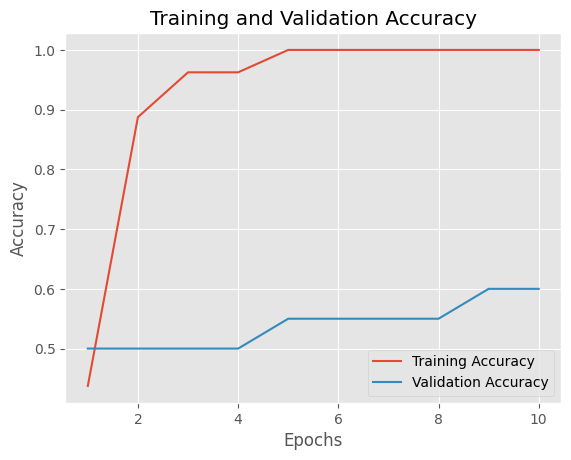

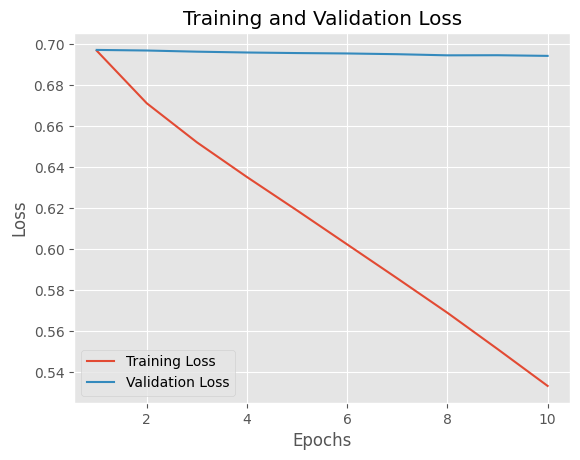

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

# Grab the right metric keys (handles both 'acc' and 'accuracy' versions)
acc = training_history.history.get('acc') or training_history.history.get('accuracy')
val_acc = training_history.history.get('val_acc') or training_history.history.get('val_accuracy')
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.figure()
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
eval_loss, eval_accuracy = simple_model.evaluate(test_reviews, test_labels)
print('Test loss:', eval_loss)
print('Test accuracy:', eval_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5008 - loss: 0.6936
Test loss: 0.693841278553009
Test accuracy: 0.5


In [75]:
import numpy as np_array
from keras.datasets import imdb as imdb_data
from keras.preprocessing.sequence import pad_sequences as pad_to_length

# Set basic options
max_features = 10000      # Use only the 10,000 most common words
fixed_seq_length = 150    # Make every review length 150

# Load movie review data
(train_data, train_targets), (test_data, test_targets) = imdb_data.load_data(num_words=max_features)

# Make all reviews the same length by padding
train_data = pad_to_length(train_data, maxlen=fixed_seq_length)
test_data = pad_to_length(test_data, maxlen=fixed_seq_length)

# Join all reviews and labels into single arrays
all_reviews = np_array.concatenate((train_data, test_data), axis=0)
all_labels = np_array.concatenate((train_targets, test_targets), axis=0)

# Keep only the first 5,000 samples for training
train_data = train_data[:5000]
train_targets = train_targets[:5000]

In [76]:
# Build the second model
second_model = SequentialModel()
second_model.add(EmbeddingLayer(10000, 8, input_length=150))
second_model.add(FlattenLayer())
second_model.add(DenseLayer(1, activation='sigmoid'))

# Choose optimizer, loss function, and metric to track
second_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

# Train the model using the training data
second_history = second_model.fit(
    train_data, train_targets,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Display the model layout and number of parameters
second_model.summary()

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.5196 - loss: 0.6925 - val_acc: 0.5240 - val_loss: 0.6904
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7252 - loss: 0.6715 - val_acc: 0.6440 - val_loss: 0.6737
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8266 - loss: 0.6232 - val_acc: 0.7160 - val_loss: 0.6272
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8709 - loss: 0.5284 - val_acc: 0.7590 - val_loss: 0.5537
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9056 - loss: 0.4154 - val_acc: 0.7720 - val_loss: 0.5029
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9254 - loss: 0.3277 - val_acc: 0.7910 - val_loss: 0.4539
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9450 - loss: 0.2483 - val_acc: 0.8060 - val_loss: 0.4319
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9700 - loss: 0.1901 - val_acc: 0.8140 - val_loss: 0.4164
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (32, 150, 8)           │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 1200)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 1)                │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

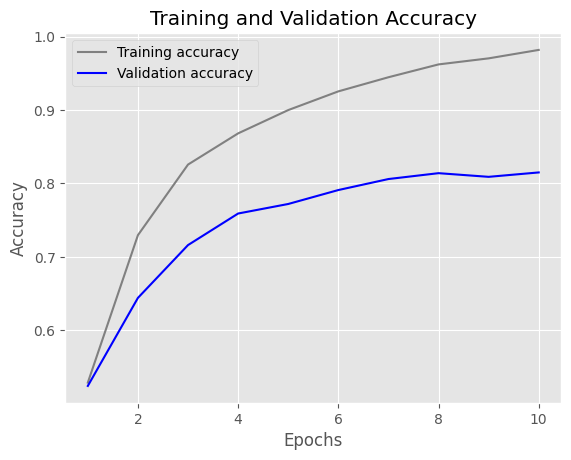

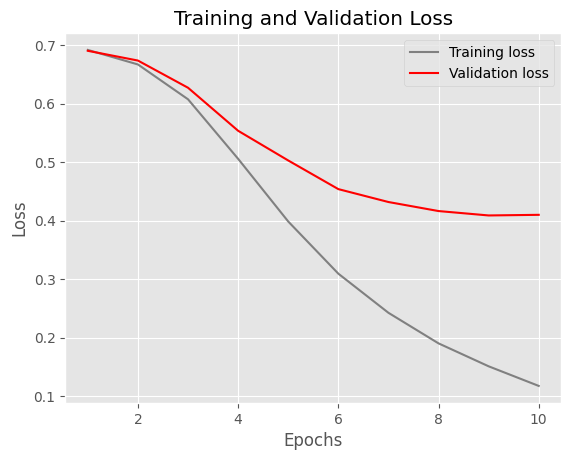

In [77]:
import matplotlib.pyplot as plot_charts

# Get accuracy and loss values from training
train_accuracy_values_2 = second_history.history['acc']
val_accuracy_values_2 = second_history.history['val_acc']
train_loss_values_2 = second_history.history['loss']
val_loss_values_2 = second_history.history['val_loss']

# Create list of epoch numbers
epoch_range_2 = range(1, len(train_accuracy_values_2) + 1)

# Draw training vs validation accuracy
plot_charts.figure()
plot_charts.plot(epoch_range_2, train_accuracy_values_2, 'grey', label='Training accuracy')
plot_charts.plot(epoch_range_2, val_accuracy_values_2, 'b', label='Validation accuracy')
plot_charts.title('Training and Validation Accuracy')
plot_charts.xlabel('Epochs')
plot_charts.ylabel('Accuracy')
plot_charts.legend()
plot_charts.grid(True)

# Draw training vs validation loss
plot_charts.figure()
plot_charts.plot(epoch_range_2, train_loss_values_2, 'grey', label='Training loss')
plot_charts.plot(epoch_range_2, val_loss_values_2, 'r', label='Validation loss')
plot_charts.title('Training and Validation Loss')
plot_charts.xlabel('Epochs')
plot_charts.ylabel('Loss')
plot_charts.legend()
plot_charts.grid(True)

plot_charts.show()

In [78]:
# Check how well the second model works on the test set
eval_loss_2, eval_accuracy_2 = second_model.evaluate(test_data, test_targets)

# Show test results
print('Test loss:', eval_loss_2)
print('Test accuracy:', eval_accuracy_2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8256 - loss: 0.3832
Test loss: 0.382372111082077
Test accuracy: 0.8243200182914734


In [79]:
import numpy as np_array
from keras.datasets import imdb as imdb_data
from keras.preprocessing.sequence import pad_sequences as pad_to_length

# Basic settings
max_words = 10000      # Use only the 10,000 most common words
max_len = 150          # Make every review length 150

# Load the movie review data
(train_reviews, train_labels), (test_reviews, test_labels) = imdb_data.load_data(num_words=max_words);

# Make all review sequences the same length
train_reviews = pad_to_length(train_reviews, maxlen=max_len)
test_reviews = pad_to_length(test_reviews, maxlen=max_len)

# Join all reviews and all labels into single arrays
all_reviews = np_array.concatenate((train_reviews, test_reviews), axis=0)
all_labels = np_array.concatenate((train_labels, test_labels), axis=0)

# Use only the first 1000 samples for training
train_reviews = train_reviews[:1000]
train_labels = train_labels[:1000]

In [80]:
from keras.models import Sequential as SequentialModel
from keras.layers import Embedding as EmbeddingLayer, Flatten as FlattenLayer, Dense as DenseLayer

# Set vocabulary size and review length
max_words = 10000     # Number of different words to consider
max_len = 150         # Each review will be padded/truncated to 150 words

# Create the model and give it a clear name
second_sequence_model = SequentialModel(name="sequential_2")
second_sequence_model.add(
    EmbeddingLayer(
        input_dim=max_words,
        output_dim=8,
        input_length=max_len,
        name="embedding_3"
    )
)
second_sequence_model.add(FlattenLayer(name="flatten_2"))
second_sequence_model.add(
    DenseLayer(
        1,
        activation='sigmoid',
        name="dense_2"
    )
)

# Set optimizer, loss, and metric
second_sequence_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

# Build the model to set layer shapes
second_sequence_model.build(input_shape=(None, max_len))

# Show the full model structure
second_sequence_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 150, 8)         │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# Train this model on the training data for 10 rounds
second_history = second_sequence_model.fit(
    train_reviews, train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.4898 - loss: 0.6929 - val_acc: 0.5300 - val_loss: 0.6900
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7293 - loss: 0.6767 - val_acc: 0.5450 - val_loss: 0.6890
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8887 - loss: 0.6579 - val_acc: 0.5550 - val_loss: 0.6876
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9323 - loss: 0.6369 - val_acc: 0.5750 - val_loss: 0.6858
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9430 - loss: 0.6135 - val_acc: 0.5650 - val_loss: 0.6833
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9639 - loss: 0.5847 - val_acc: 0.5900 - val_loss: 0.6805
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9659 - loss: 0.5450 - val_acc: 0.6100 - val_loss: 0.6774
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9650 - loss: 0.5057 - val_acc: 0.6250 - val_loss: 0.6737
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9708 - loss:

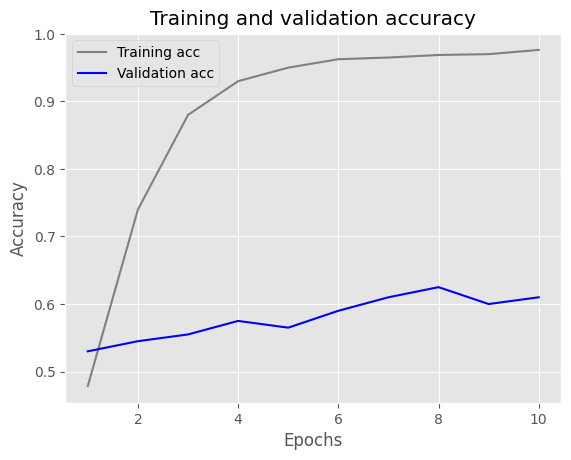

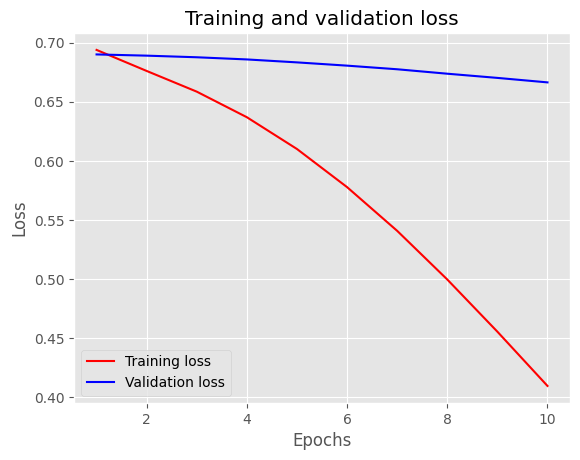

In [82]:
import matplotlib.pyplot as plt

# Safely grab accuracy values (works for 'acc' or 'accuracy')
accuracy3 = second_history.history.get("acc") or second_history.history.get("accuracy")
validation_accuracy3 = second_history.history.get("val_acc") or second_history.history.get("val_accuracy")

Train_loss3 = second_history.history["loss"]
validation_loss3 = second_history.history["val_loss"]

epochs = range(1, len(accuracy3) + 1)

# Accuracy plot
plt.figure()
plt.plot(epochs, accuracy3, "grey", label="Training acc")
plt.plot(epochs, validation_accuracy3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.figure()
plt.plot(epochs, Train_loss3, "red", label="Training loss")
plt.plot(epochs, validation_loss3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [83]:
# Test the third model on unseen test data
eval_loss_3, eval_accuracy_3 = second_sequence_model.evaluate(test_reviews, test_labels)

# Show the test loss and test accuracy values
print('Test loss:', eval_loss_3)
print('Test accuracy:', eval_accuracy_3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5540 - loss: 0.6845
Test loss: 0.6845245361328125
Test accuracy: 0.5542799830436707


In [84]:
# Basic settings for this dataset
max_words = 10000   # Use only the 10,000 most common words
max_len = 150       # Make every review length 150

# Load the IMDB movie review data
(train_reviews, train_labels), (test_reviews, test_labels) = imdb_data.load_data(num_words=max_words)

# Make all review sequences the same length
train_reviews = pad_to_length(train_reviews, maxlen=max_len)
test_reviews = pad_to_length(test_reviews, maxlen=max_len)

# Join all reviews and all labels into single arrays
all_reviews = np_array.concatenate((train_reviews, test_reviews), axis=0)
all_labels = np_array.concatenate((train_labels, test_labels), axis=0)

# Keep only the first 10,000 reviews for training
train_reviews = train_reviews[:10000]
train_labels = train_labels[:10000]

In [85]:
from keras.models import Sequential as SequentialModel
from keras.layers import Embedding as EmbeddingLayer, Flatten as FlattenLayer, Dense as DenseLayer
from keras.datasets import imdb as imdb_data
from keras.preprocessing.sequence import pad_sequences as pad_to_length
import numpy as np_array

# Basic options
vocab_size = 10000      # Use only the 10,000 most common words
review_length = 150     # Make each review length 150

# Load and prepare the IMDB reviews
(train_reviews, train_labels), (test_reviews, test_labels) = imdb_data.load_data(num_words=vocab_size)
train_reviews = pad_to_length(train_reviews, maxlen=review_length)
test_reviews = pad_to_length(test_reviews, maxlen=review_length)

# Use only the first 10,000 training reviews
train_reviews = train_reviews[:10000]
train_labels = train_labels[:10000]

# Build the model with a clear name
fourth_model = SequentialModel(name="sequential_4")
fourth_model.add(EmbeddingLayer(vocab_size, 8, input_length=review_length, name="embedding_4"))
fourth_model.add(FlattenLayer(name="flatten_4"))
fourth_model.add(DenseLayer(1, activation='sigmoid', name="dense_4"))

# Set optimizer, loss function, and metric
fourth_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model (this also builds it)
fourth_history = fourth_model.fit(
    train_reviews, train_labels,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Show the model structure and parameters
fourth_model.summary()

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.5233 - loss: 0.6921 - val_acc: 0.6330 - val_loss: 0.6765
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7431 - loss: 0.6291 - val_acc: 0.7955 - val_loss: 0.5171
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8455 - loss: 0.4454 - val_acc: 0.8415 - val_loss: 0.3897
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8881 - loss: 0.3205 - val_acc: 0.8530 - val_loss: 0.3415
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9200 - loss: 0.2445 - val_acc: 0.8610 - val_loss: 0.3246
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9290 - loss: 0.2103 - val_acc: 0.8555 - val_loss: 0.3177
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9457 - loss: 0.1739 - val_acc: 0.8445 - val_loss: 0.3399
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9579 - loss: 0.1437 - val_acc: 0.8635 - val_loss: 0.3171
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 150, 8)           │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 1200)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (32, 1)                │         1,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,404 (634.39 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,203 (317.20 KB)

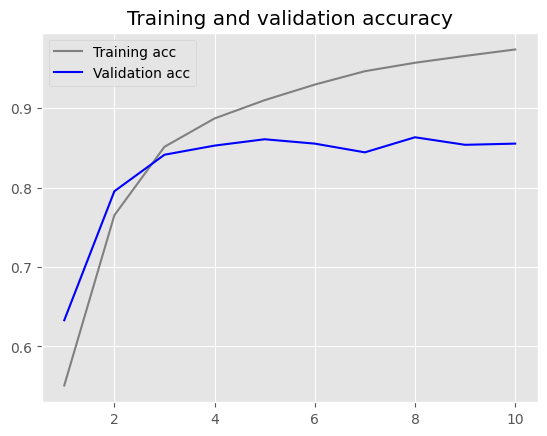

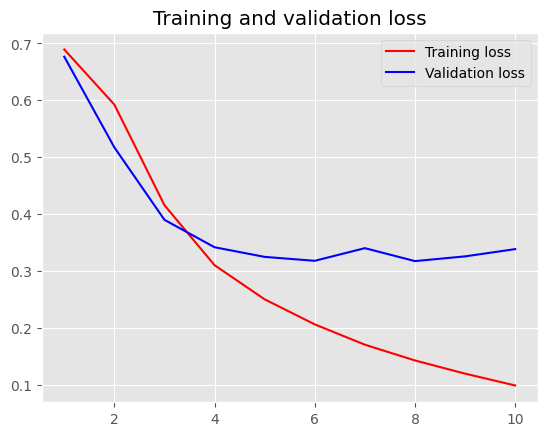

In [86]:
# Get accuracy and loss values from training history
train_accuracy_vals_4 = fourth_history.history["acc"]
val_accuracy_vals_4 = fourth_history.history["val_acc"]
train_loss_vals_4 = fourth_history.history["loss"]
val_loss_vals_4 = fourth_history.history["val_loss"]

# Create a range of epoch numbers
epoch_indexes_4 = range(1, len(train_accuracy_vals_4) + 1)

# Plot training and validation accuracy
plt.plot(epoch_indexes_4, train_accuracy_vals_4, "grey", label="Training acc")
plt.plot(epoch_indexes_4, val_accuracy_vals_4, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epoch_indexes_4, train_loss_vals_4, "red", label="Training loss")
plt.plot(epoch_indexes_4, val_loss_vals_4, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [87]:
# Test the fourth model on the test reviews
eval_loss_4, eval_accuracy_4 = fourth_model.evaluate(test_reviews, test_labels)

# Show the test loss and test accuracy
print('Test loss:', eval_loss_4)
print('Test accuracy:', eval_accuracy_4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8477 - loss: 0.3577
Test loss: 0.351150244474411
Test accuracy: 0.8504800200462341


In [88]:
# Download the IMDB sentiment dataset archive from Stanford
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Extract the downloaded .tar.gz file into the current folder
!tar -xf aclImdb_v1.tar.gz

# Delete the unsupervised training reviews (you only keep labeled data)
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3838k      0  0:00:21  0:00:21 --:--:-- 5561k


In [89]:
import os as operating_system

# Main folder where the IMDB data is stored
imdb_folder = 'aclImdb'
train_folder = operating_system.path.join(imdb_folder, 'train')

# Lists to keep all review text and labels
review_texts = []   # List of review strings
review_labels = []  # 0 = negative, 1 = positive

# Go through negative and positive folders
for sentiment_type in ['neg', 'pos']:
    sentiment_folder = operating_system.path.join(train_folder, sentiment_type)

    for file_name in operating_system.listdir(sentiment_folder):
        # Use only text files
        if file_name.endswith('.txt'):
            file_path = operating_system.path.join(sentiment_folder, file_name)
            with open(file_path, encoding='utf-8') as review_file:
                review_texts.append(review_file.read())

            # 0 for negative, 1 for positive
            review_labels.append(0 if sentiment_type == 'neg' else 1)

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer as TextTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences as pad_to_maxlen
import numpy as np_array

max_review_len = 150      # Keep only the last 150 words in each review
num_train_samples = 100   # Number of samples used for training
num_val_samples = 10000   # Number of samples used for validation
max_words_count = 10000   # Only keep the 10,000 most common words

# Turn words into integer sequences
text_tokenizer = TextTokenizer(num_words=max_words_count)
text_tokenizer.fit_on_texts(review_texts)
review_sequences = text_tokenizer.texts_to_sequences(review_texts)

word_index_map = text_tokenizer.word_index
print("Found %s unique tokens." % len(word_index_map))

# Make all sequences the same length
data_tensor = pad_to_maxlen(review_sequences, maxlen=max_review_len)

# Convert labels list into a NumPy array
label_array = np_array.asarray(review_labels)
print("Shape of data tensor:", data_tensor.shape)
print("Shape of label tensor:", label_array.shape)

# Shuffle the data and labels in the same order
row_indexes = np_array.arange(data_tensor.shape[0])
np_array.random.shuffle(row_indexes)
data_tensor = data_tensor[row_indexes]
label_array = label_array[row_indexes]

# Split into training, validation, and test sets
train_inputs = data_tensor[:num_train_samples]
train_targets = label_array[:num_train_samples]
val_inputs = data_tensor[num_train_samples:num_train_samples + num_val_samples]
val_targets = label_array[num_train_samples:num_train_samples + num_val_samples]
test_inputs = data_tensor[num_train_samples + num_val_samples:]
test_targets = label_array[num_train_samples + num_val_samples:]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [91]:
import numpy as np_array
import requests as web_requests
from io import BytesIO as MemoryBytes
import zipfile as zip_tool

# Link to download GloVe word vectors (6B tokens, 100-dimensional vectors)
glove_download_link = 'https://nlp.stanford.edu/data/glove.6B.zip'

# Get the zip file from the internet
glove_response = web_requests.get(glove_download_link)

# Unzip everything into this folder
with zip_tool.ZipFile(MemoryBytes(glove_response.content)) as zip_file:
    zip_file.extractall('/content/glove')

# Read GloVe word vectors into a dictionary
glove_embeddings = {}
glove_text_file = '/content/glove/glove.6B.100d.txt'

with open(glove_text_file, encoding='utf-8') as glove_handle:
    for line in glove_handle:
        parts = line.split()
        word_key = parts[0]
        vector_values = np_array.asarray(parts[1:], dtype='float32')
        glove_embeddings[word_key] = vector_values

# Show how many words have vectors
print("Found %s word vectors." % len(glove_embeddings))

Found 400000 word vectors.


In [92]:
# Size of each word vector (must match the GloVe file you used)
embedding_dim = 100

# Start with all zeros: rows = number of words, columns = size of each vector
word_embedding_matrix = np.zeros((max_words_count, embedding_dim))

# Go through every word and its index from the tokenizer
for word_text, word_id in word_index_map.items():
    # Only keep words within our chosen limit
    if word_id < max_words_count:
        # Get the GloVe vector for this word (if it exists)
        glove_vector = glove_embeddings.get(word_text)
        if glove_vector is not None:
            word_embedding_matrix[word_id] = glove_vector

In [93]:
from keras.models import Sequential as SequentialModel
from keras.layers import Embedding as EmbeddingLayer, Flatten as FlattenLayer, Dense as DenseLayer

# Create a model that uses pre-trained word vectors
glove_model = SequentialModel(name="sequential_8")
glove_model.add(
    EmbeddingLayer(
        input_dim=max_words_count,
        output_dim=embedding_dim,
        input_length=max_review_len,
        name="embedding_9"
    )
)
glove_model.add(FlattenLayer(name="flatten_8"))
glove_model.add(DenseLayer(32, activation='relu', name="dense_9"))
glove_model.add(DenseLayer(1, activation='sigmoid', name="dense_10"))

# Build the model so that layer shapes are set before showing summary
glove_model.build(input_shape=(None, max_review_len))
glove_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,480,065 (5.65 MB)

 Trainable params: 1,480,065 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Put the GloVe word vectors into the first embedding layer
glove_model.layers[0].set_weights([word_embedding_matrix])

# Do not update these GloVe weights during training
glove_model.layers[0].trainable = False

In [95]:
# Choose optimizer, loss function, and metric to track
glove_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

# Train the model on the training data and check it on validation data
glove_history = glove_model.fit(
    train_inputs,
    train_targets,
    epochs=10,
    batch_size=32,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - acc: 0.4182 - loss: 3.0847 - val_acc: 0.5018 - val_loss: 1.5673
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - acc: 0.7348 - loss: 0.6917 - val_acc: 0.5180 - val_loss: 0.7899
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - acc: 0.6470 - loss: 0.7944 - val_acc: 0.5415 - val_loss: 0.7334
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - acc: 1.0000 - loss: 0.1430 - val_acc: 0.5535 - val_loss: 0.7281
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - acc: 1.0000 - loss: 0.0907 - val_acc: 0.5758 - val_loss: 0.6925
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - acc: 1.0000 - loss: 0.0669 - val_acc: 0.5193 - val_loss: 0.8646
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - acc: 1.0000 - loss: 0.0602 - val_acc: 0.5377 - val_loss: 0.7644
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - acc: 1.0000 - loss: 0.0488 - val_acc: 0.5815 - val_loss: 0.6920
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - acc: 1.0000 - loss: 

In [96]:
# Save the learned weights to a file so you can reuse the model later
glove_model.save_weights('pre_trained_glove_model.weights.h5')

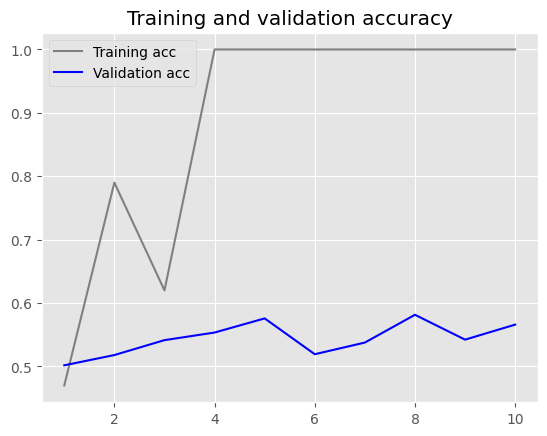

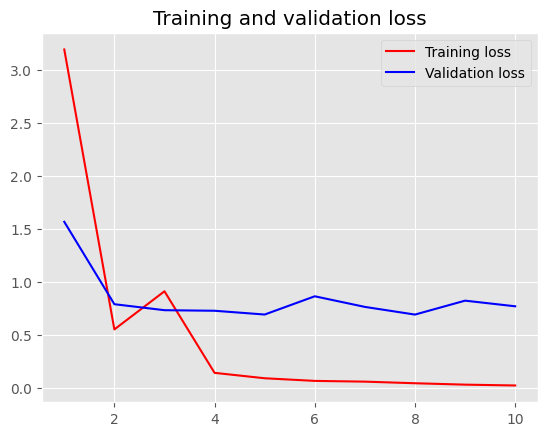

In [97]:
import matplotlib.pyplot as metrics_plotter

# Get accuracy and loss values from training
train_accuracy_values = glove_history.history["acc"]
validation_accuracy_values = glove_history.history["val_acc"]
train_loss_values = glove_history.history["loss"]
validation_loss_values = glove_history.history["val_loss"]

# Create a list of epoch numbers
epoch_numbers = range(1, len(train_accuracy_values) + 1)

# Plot training and validation accuracy
metrics_plotter.plot(epoch_numbers, train_accuracy_values, "grey", label="Training acc")
metrics_plotter.plot(epoch_numbers, validation_accuracy_values, "b", label="Validation acc")
metrics_plotter.title("Training and validation accuracy")
metrics_plotter.legend()

metrics_plotter.figure()

# Plot training and validation loss
metrics_plotter.plot(epoch_numbers, train_loss_values, "red", label="Training loss")
metrics_plotter.plot(epoch_numbers, validation_loss_values, "b", label="Validation loss")
metrics_plotter.title("Training and validation loss")
metrics_plotter.legend()

metrics_plotter.show()

In [98]:
# Check how well the model works on the test set
final_test_loss, final_test_accuracy = glove_model.evaluate(test_inputs, test_targets)

print('Test loss:', final_test_loss)
print('Test accuracy:', final_test_accuracy)

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5644 - loss: 0.7665
Test loss: 0.7725117206573486
Test accuracy: 0.561610758304596


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,480,065 (5.65 MB)

 Trainable params: 1,480,065 (5.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - acc: 0.5220 - loss: 1.0053 - val_acc: 0.5168 - val_loss: 0.6830
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5999 - loss: 0.6701 - val_acc: 0.5617 - val_loss: 0.6836
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7173 - loss: 0.5564 - val_acc: 0.6223 - val_loss: 0.6686
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.8115 - loss: 0.4348 - val_acc: 0.6709 - val_loss: 0.6183
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8557 - loss: 0.3484 - val_acc: 0.6571 - val_loss: 0.6667
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9056 - loss: 0.2599 - val_acc: 0.6471 - val_loss: 0.7486
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9281 - loss: 0.1978 - val_acc: 0.6631 - val_loss: 0.8071
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9556 - loss: 0.1452 - val_acc: 0.6552 - val_loss: 0.8774
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - a

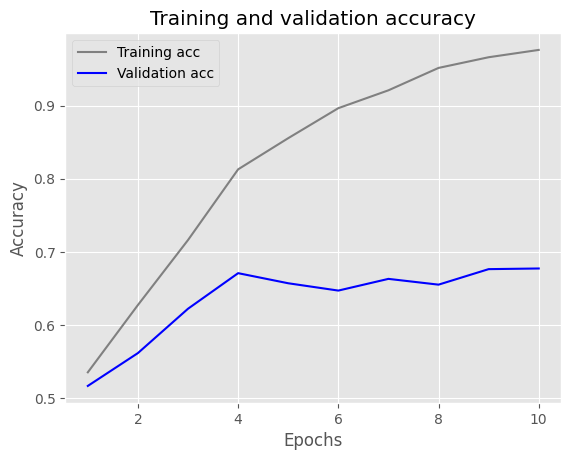

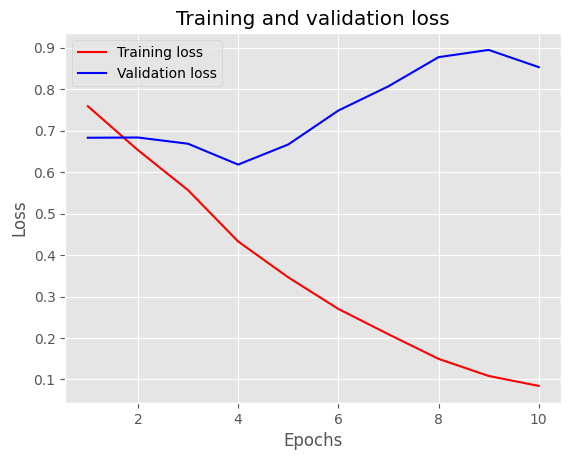

In [99]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Basic settings
max_seq_len = 150      # Keep only 150 words from each review
train_sample_count = 5000   # Number of training reviews
val_sample_count = 10000    # Number of validation reviews
max_words = 10000           # Use only the 10,000 most common words
embedding_dim = 100         # Size of each word vector

# Turn reviews into sequences of word IDs and pad them
text_tokenizer = Tokenizer(num_words=max_words)
text_tokenizer.fit_on_texts(review_texts)
review_sequences = text_tokenizer.texts_to_sequences(review_texts)
token_index = text_tokenizer.word_index
print("Found %s unique tokens." % len(token_index))

padded_data = pad_sequences(review_sequences, maxlen=max_seq_len)
labels = np.asarray(review_labels)
print("Shape of data tensor:", padded_data.shape)
print("Shape of label tensor:", labels.shape)

# Shuffle the reviews and labels in the same random order
row_indices = np.arange(padded_data.shape[0])
np.random.shuffle(row_indices)
padded_data = padded_data[row_indices]
labels = labels[row_indices]

# Split into training and validation sets
train_inputs = padded_data[:train_sample_count]
train_targets = labels[:train_sample_count]
val_inputs = padded_data[train_sample_count:train_sample_count + val_sample_count]
val_targets = labels[train_sample_count:train_sample_count + val_sample_count]

# Build the embedding matrix using GloVe vectors
glove_embedding_matrix = np.zeros((max_words, embedding_dim))
for word, idx in token_index.items():
    if idx < max_words:
        glove_vector = glove_embeddings.get(word)
        if glove_vector is not None:
            glove_embedding_matrix[idx] = glove_vector


from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Settings for the embedding layer
vocab_size = 10000        # Number of words in the vocabulary
embed_size = 100          # Size of each word embedding
sequence_len = 150        # Length of each input sequence

# Build the neural network
glove_model = Sequential()
glove_model.add(Embedding(input_dim=vocab_size,
                          output_dim=embed_size,
                          input_length=sequence_len))
glove_model.add(Flatten())
glove_model.add(Dense(32, activation='relu'))
glove_model.add(Dense(1, activation='sigmoid'))

# Build once to set layer shapes
glove_model.build(input_shape=(None, sequence_len))

# Show the model structure and number of parameters
glove_model.summary()

# Build again so we can safely set weights
glove_model.build(input_shape=(None, sequence_len))

# Load the pre-trained GloVe weights into the embedding layer
glove_model.layers[0].set_weights([glove_embedding_matrix])
glove_model.layers[0].trainable = False  # Freeze embeddings so they are not updated

# Compile and train the model
glove_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

history_glove = glove_model.fit(
    train_inputs, train_targets,
    epochs=10,
    batch_size=32,
    validation_data=(val_inputs, val_targets)
)

# Save the trained weights
glove_model.save_weights('pre_trained_glove_model.weights.h5')

# Plot training and validation curves
train_acc_values = history_glove.history['acc']
val_acc_values = history_glove.history['val_acc']
train_loss_values = history_glove.history['loss']
val_loss_values = history_glove.history['val_loss']

epoch_range = range(1, len(train_acc_values) + 1)

plt.plot(epoch_range, train_acc_values, 'grey', label='Training acc')
plt.plot(epoch_range, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, train_loss_values, 'red', label='Training loss')
plt.plot(epoch_range, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [100]:
# Test the model on the held-out test data
eval_loss_glove, eval_acc_glove = glove_model.evaluate(test_inputs, test_targets)

# Show the test loss and accuracy
print('Test loss:', eval_loss_glove)
print('Test accuracy:', eval_acc_glove)

466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7428 - loss: 0.6777
Test loss: 0.6933494806289673
Test accuracy: 0.7397315502166748


In [101]:
import numpy as np

# Set basic options
max_len = 150              # Each review will be cut or padded to 150 words
num_train_samples = 1000   # Number of reviews used for training
num_val_samples = 10000    # Number of reviews used for validation
max_words = 10000          # Only keep the 10,000 most common words

# Turn text reviews into integer sequences
text_tokenizer3 = Tokenizer(num_words=max_words)
text_tokenizer3.fit_on_texts(review_texts)
encoded_reviews = text_tokenizer3.texts_to_sequences(review_texts)
token_index3 = text_tokenizer3.word_index
print("Found %s unique tokens." % len(token_index3))

# Make all sequences the same length
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_len)

# Convert labels list to a NumPy array
label_array = np.asarray(review_labels)
print("Shape of data tensor:", padded_reviews.shape)
print("Shape of label tensor:", label_array.shape)

# Shuffle reviews and labels in the same random order
shuffled_indices = np.arange(padded_reviews.shape[0])
np.random.shuffle(shuffled_indices)
padded_reviews = padded_reviews[shuffled_indices]
label_array = label_array[shuffled_indices]

# Split into training, validation, and test sets
train_inputs_small = padded_reviews[:num_train_samples]
train_targets_small = label_array[:num_train_samples]
val_inputs_small = padded_reviews[num_train_samples:num_train_samples + num_val_samples]
val_targets_small = label_array[num_train_samples:num_train_samples + num_val_samples]
test_inputs_small = padded_reviews[num_train_samples + num_val_samples:]
test_targets_small = label_array[num_train_samples + num_val_samples:]

# Size of each word vector
embedding_size = 100

# Create an embedding matrix filled with zeros
embedding_matrix_small = np.zeros((max_words, embedding_size))

# Fill the matrix with GloVe vectors where available
for word, idx in token_index3.items():
    glove_vector = glove_embeddings.get(word)
    if idx < max_words:
        if glove_vector is not None:
            embedding_matrix_small[idx] = glove_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [102]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# Set main model options
vocab_size_small = 10000     # Number of different words to use
embed_size_small = 100       # Size of each word vector
seq_len_small = 150          # Length of each input review

# Build the neural network
small_glove_model = Sequential()
small_glove_model.add(Embedding(vocab_size_small, embed_size_small, input_length=seq_len_small))
small_glove_model.add(Flatten())
small_glove_model.add(Dense(32, activation='relu'))
small_glove_model.add(Dense(1, activation='sigmoid'))

# Make the model shape fixed before we load weights
small_glove_model.build(input_shape=(None, seq_len_small))

# Put the pre-trained GloVe weights into the embedding layer
small_glove_model.layers[0].set_weights([embedding_matrix_small])
small_glove_model.layers[0].trainable = False

# Prepare the model for training
small_glove_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['acc'])

# Train on the training set and check on the validation set
history_small_glove = small_glove_model.fit(
    train_inputs_small, train_targets_small,
    epochs=10,
    batch_size=32,
    validation_data=(val_inputs_small, val_targets_small)
)

# Show the final model layout and parameter counts
small_glove_model.summary()

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.5208 - loss: 1.4567 - val_acc: 0.5045 - val_loss: 0.9270
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.6883 - loss: 0.5857 - val_acc: 0.5079 - val_loss: 0.9507
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.7653 - loss: 0.4668 - val_acc: 0.5694 - val_loss: 0.7451
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.8042 - loss: 0.3951 - val_acc: 0.5432 - val_loss: 0.9787
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9447 - loss: 0.2142 - val_acc: 0.5783 - val_loss: 0.8436
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9337 - loss: 0.1949 - val_acc: 0.6214 - val_loss: 0.7261
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9869 - loss: 0.0934 - val_acc: 0.6282 - val_loss: 0.7362
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9881 - loss: 0.0826 - val_acc: 0.6209 - val_loss: 0.8191
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9981

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,960,132 (7.48 MB)

 Trainable params: 480,065 (1.83 MB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 480,067 (1.83 MB)

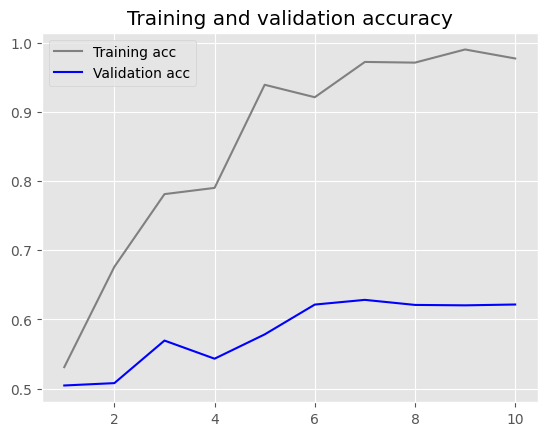

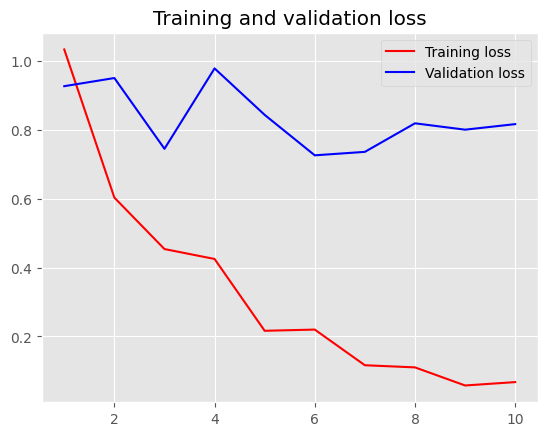

In [103]:
import matplotlib.pyplot as plt

acc12 = history_small_glove.history['acc']
val_acc12 = history_small_glove.history['val_acc']
loss12 = history_small_glove.history['loss']
val_loss12 = history_small_glove.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
# Test how well this model works on the test reviews
final_loss_small, final_accuracy_small = small_glove_model.evaluate(test_inputs_small, test_targets_small)
print('Test loss:', final_loss_small)
print('Test accuracy:', final_accuracy_small)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6165 - loss: 0.8233
Test loss: 0.8087003827095032
Test accuracy: 0.6207143068313599


In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Basic settings
max_seq_len = 150      # Use 150 words per review
train_size = 10000     # Number of training samples
val_size = 10000       # Number of validation samples
max_vocab = 10000      # Use the 10,000 most common words
embed_dim = 100        # Size of each word vector

# Turn text into sequences of word IDs
review_tokenizer = Tokenizer(num_words=max_vocab)
review_tokenizer.fit_on_texts(review_texts)
review_seqs = review_tokenizer.texts_to_sequences(review_texts)
token_dict = review_tokenizer.word_index
print("Found %s unique tokens." % len(token_dict))

# Make all sequences the same length
review_data = pad_sequences(review_seqs, maxlen=max_seq_len)

# Turn label list into a NumPy array
label_array = np.asarray(review_labels)
print("Shape of data tensor:", review_data.shape)
print("Shape of label tensor:", label_array.shape)

# Shuffle data and labels in the same way
shuffle_idx = np.arange(review_data.shape[0])
np.random.shuffle(shuffle_idx)
review_data = review_data[shuffle_idx]
label_array = label_array[shuffle_idx]

# Split into training and validation sets
train_features = review_data[:train_size]
train_labels = label_array[:train_size]
val_features = review_data[train_size:train_size + val_size]
val_labels = label_array[train_size:train_size + val_size]
test_features = review_data[train_size + val_size:] # Define test_features
test_labels = label_array[train_size + val_size:] # Define test_labels

# Create the GloVe embedding matrix
glove_matrix = np.zeros((max_vocab, embed_dim))
for word, idx in token_dict.items():
    if idx < max_vocab:
        glove_vec = glove_embeddings.get(word)
        if glove_vec is not None:
            glove_matrix[idx] = glove_vec

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Build a model that uses the GloVe word vectors
glove_sentiment_model = Sequential()
glove_sentiment_model.add(
    Embedding(
        input_dim=max_vocab,      # size of the word list
        output_dim=embed_dim,     # size of each word vector
        input_length=max_seq_len  # length of each review
    )
)
glove_sentiment_model.add(Flatten())
glove_sentiment_model.add(Dense(32, activation='relu'))
glove_sentiment_model.add(Dense(1, activation='sigmoid'))

# Fix the input shape before loading the weights
glove_sentiment_model.build(input_shape=(None, max_seq_len))

# Load the pre-trained GloVe weights into the embedding layer
glove_sentiment_model.layers[0].set_weights([glove_matrix])
glove_sentiment_model.layers[0].trainable = False  # do not update GloVe weights

# Get the model ready for training
glove_sentiment_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

# Train the model on the training data and check on validation data
history_glove_13 = glove_sentiment_model.fit(
    train_features,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_features, val_labels)
)

# Show the full model layout and parameter counts
glove_sentiment_model.summary()

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.5759 - loss: 1.0047 - val_acc: 0.7029 - val_loss: 0.5764
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7372 - loss: 0.5265 - val_acc: 0.7127 - val_loss: 0.5571
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8014 - loss: 0.4237 - val_acc: 0.6674 - val_loss: 0.6960
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8419 - loss: 0.3574 - val_acc: 0.6982 - val_loss: 0.6386
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8923 - loss: 0.2737 - val_acc: 0.7054 - val_loss: 0.6510
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9113 - loss: 0.2294 - val_acc: 0.7073 - val_loss: 0.7403
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9354 - loss: 0.1766 - val_acc: 0.7054 - val_loss: 0.7838
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9486 - loss: 0.1387 - val_acc: 0.7023 - val_loss: 0.8451
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 150, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 15000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │       480,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,960,132 (7.48 MB)

 Trainable params: 480,065 (1.83 MB)

 Non-trainable params: 1,000,000 (3.81 MB)

 Optimizer params: 480,067 (1.83 MB)

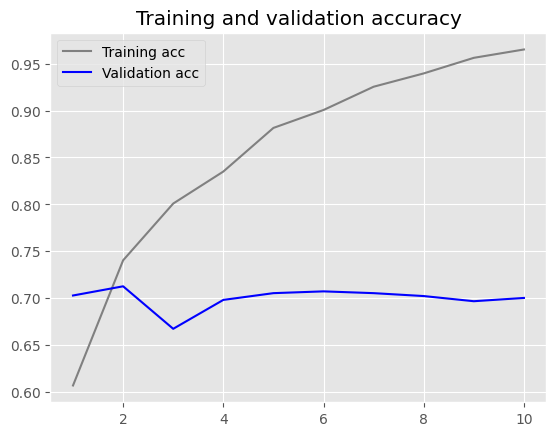

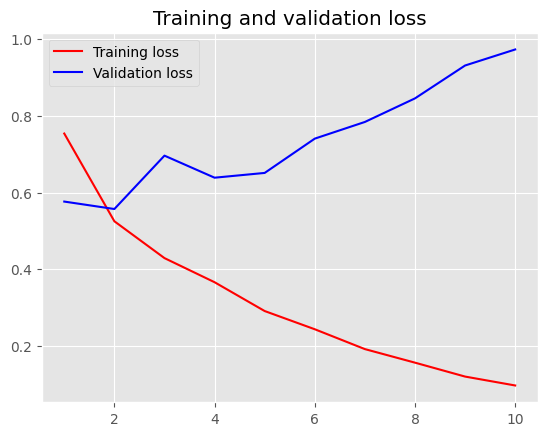

In [107]:
import matplotlib.pyplot as plt  # Used to draw the graphs

# Get accuracy and loss values from training history
train_acc_values_13 = history_glove_13.history['acc']
val_acc_values_13 = history_glove_13.history['val_acc']
train_loss_values_13 = history_glove_13.history['loss']
val_loss_values_13 = history_glove_13.history['val_loss']

# Make a list of epoch numbers
epoch_steps_13 = range(1, len(train_acc_values_13) + 1)

# Draw training and validation accuracy
plt.plot(epoch_steps_13, train_acc_values_13, 'grey', label='Training acc')
plt.plot(epoch_steps_13, val_acc_values_13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Draw training and validation loss
plt.plot(epoch_steps_13, train_loss_values_13, 'red', label='Training loss')
plt.plot(epoch_steps_13, val_loss_values_13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [109]:
# Check how well the model works on the test data
final_test_loss_13, final_test_acc_13 = glove_sentiment_model.evaluate(test_features, test_labels)
print('Test loss:', final_test_loss_13)
print('Test accuracy:', final_test_acc_13)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6969 - loss: 1.0059
Test loss: 0.977547287940979
Test accuracy: 0.7021999955177307
